## African universities
This notebook is to obtain a comprehensive list of African universities form two different sources of data:
    _local csv file containing university information, which includes details such as university name, country, longitude and latitude.
    _universities library, which provides programmatic access to a vast collection of university information.
By combining data from these sources, the notebook aims to create a more complete and accurate list of African universities.

The resulting dataset can be used for various purposes, such as research, analysis, or generating insights into higher education across the African continent.

## local csv file

In [1]:
from pandas import pandas
from data_all import universities, universities_details
pandas.set_option('display.max_colwidth', None)
program_df = pandas.DataFrame(universities_details)
program_df.head(2)


,name,country,longitude,latitude
0,University of Cape Town,South Africa,-18.4719,-33.9628
1,Stellenbosch University,South Africa,-18.8679,-33.9321


In [2]:
seen_universities = set()
unique_universities = []
print(len(universities_details))
for university in universities_details:
    # print(university)
    university_name = university.get("name")
    if university_name not in seen_universities:
        seen_universities.add(university_name)
        unique_universities.append(university)

program_df = pandas.DataFrame(unique_universities)
 
print(len(program_df))
# universities_details.head(2)


program_df.loc[program_df['name'] == 'Stellenbosch University', ['longitude', 'latitude']] = [18.8679, -33.9321]
program_df.loc[program_df['name'] == 'University of Cape Town', ['longitude', 'latitude']] = [18.4719, -33.9628]


144
74


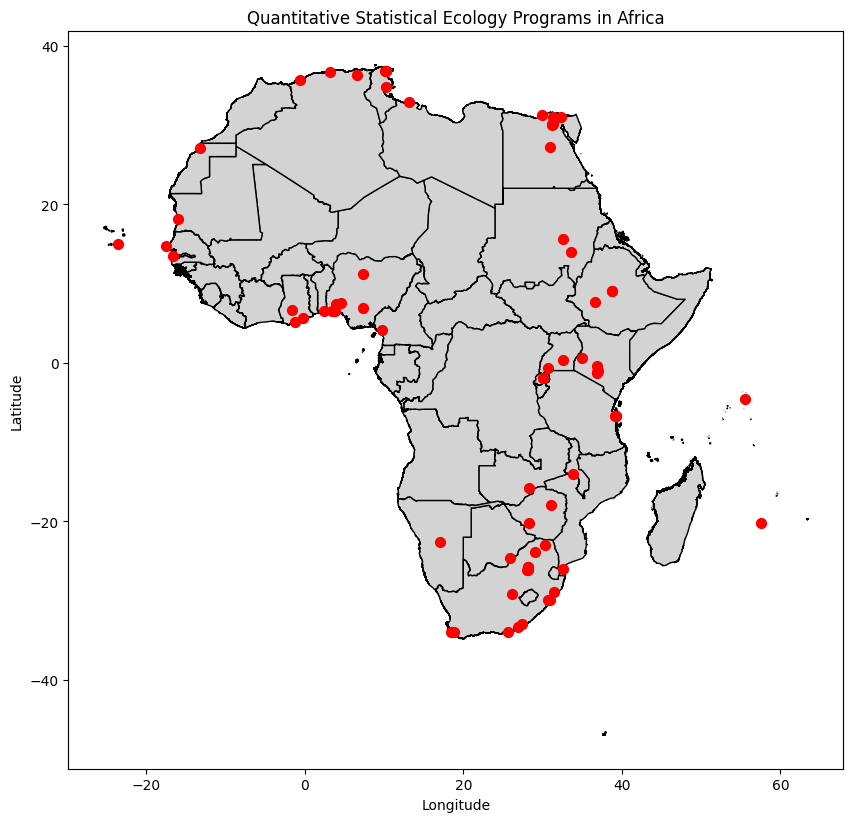

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile or GeoJSON file of African country boundaries
africa_shapefile = "/Users/asmaatbaeen/Desktop/codePhD/Ch1/afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the actual file path
  
longitudes = program_df["longitude"]
latitudes = program_df["latitude"]
# Create a GeoDataFrame from latitude and longitude values
geometry = gpd.points_from_xy(longitudes, latitudes)
program_gdf = gpd.GeoDataFrame(program_df, geometry=geometry)

# Read shapefile of African country boundaries
africa_gdf = gpd.read_file(africa_shapefile)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot African country boundaries
africa_gdf.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot quantitative statistical ecology program locations
program_gdf.plot(ax=ax, color="red", markersize=50)

# Set plot title and labels
ax.set_title("Quantitative Statistical Ecology Programs in Africa")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


## universities library

In [4]:
import pandas as pd
import universities

uni = universities.API()

try:
    df = pd.read_parquet('data_universities.parquet')
except FileNotFoundError:
    all_data = uni.get_all()
    df = pd.DataFrame(all_data)
    df.rename(columns={0: 'data'}, inplace=True)

    df.to_parquet('data_universities.parquet')

 

df


,Name,Country,Country (English)
0,Kharkiv National University,Ukraine,Ukraine
1,Universidad Técnica Federico Santa María,Chile,Chile
2,IÉSEG School of Management,France,France
3,Sun Yat-Sen University,China,China
4,Royal Holloway University of London,United Kingdom,United Kingdom
...,...,...,...
9929,Texas Wesleyan University,United States,United States
9930,Howest University of Applied Sciences,Belgium,Belgium
9931,Nazarbayev University,Kazakhstan,Kazakhstan
9932,St. George's University (Australia),Australia,Australia


##  get a list of countries in Africa using the "awoc" library

In [5]:

import awoc
# Initialize the AWOC class.
my_world = awoc.AWOC()
# Let's fetch the list of nations of Africa.
nations_of_Africa = my_world.get_countries_list_of('Africa')
 
# nations_of_Africa
print(df.dtypes)
df = df.astype(str)

print(df.dtypes)
df["data"] = df["data"].astype(str)

df = df.dropna(how='all')

df.head(2)

Name                 object
Country              object
Country (English)    object
dtype: object
Name                 object
Country              object
Country (English)    object
dtype: object


KeyError: 'data'

In [ ]:

col = list(df["data"])
name_list = []
country_list = []
# domains_list = []
# web_pages_list = []

for entry in col:
    lines = entry.split('\n')
    name = lines[0].split(':')[1].strip()
    country = lines[1].split(':')[1].strip()
    domains = [line.strip() for line in lines if line.startswith(' - ')]
    web_pages = [line.strip() for line in lines if line.startswith(' - https://')]
    
    name_list.append(name)
    country_list.append(country)
    # domains_list.extend(domains) 
    # web_pages_list.extend(web_pages)

print(len(name_list))
print(len(country_list))
# print(len(domains_list))
# print(len(web_pages_list))

# Create a dictionary from the lists
data_df = {'Name': name_list, 'Country': country_list}

# Create a DataFrame from the dictionary
df_name_coun = pandas.DataFrame(data_df)
df_name_coun['Country'] = df_name_coun['Country'].replace('Dehradun', 'India')
df_name_coun['Country'] = df_name_coun['Country'].replace('Quebec', 'Canada')

 
df_name_coun.head(2)


9934
9934


,Name,Country
0,Kharkiv National University,Ukraine
1,Universidad Técnica Federico Santa María,Chile


In [ ]:
from geopy.geocoders import Nominatim

# Initialize the geocoder
geolocator = Nominatim(user_agent='my-app')

# Create a list to store the country names
country_list = []
try:
    df_name_coun = pd.read_parquet('data_Nominatim.parquet')
except FileNotFoundError:
# Iterate over the cities in the DataFrame
    for city in df_name_coun['Country']:
        try:
            location = geolocator.geocode(city, language='en')
            country = location.raw['display_name'].split(',')[-1].strip()
            country_list.append(country)
        except Exception as e:
            print(f"Error retrieving country for {city}: {e}")
            country_list.append(city)
    # Add the country list to the DataFrame
# df_name_coun['Country (English)'] = country_list
# df_name_coun.to_parquet('data_Nominatim.parquet')
df_name_coun


,Name,Country,Country (English),Continent
0,Kharkiv National University,Ukraine,Ukraine,Europe
1,Universidad Técnica Federico Santa María,Chile,Chile,South America
2,IÉSEG School of Management,France,France,Europe
3,Sun Yat-Sen University,China,China,Asia
4,Royal Holloway University of London,United Kingdom,United Kingdom,Europe
...,...,...,...,...
9929,Texas Wesleyan University,United States,United States,North America
9930,Howest University of Applied Sciences,Belgium,Belgium,Europe
9931,Nazarbayev University,Kazakhstan,Kazakhstan,Asia
9932,St. George's University (Australia),Australia,Australia,Oceania


In [ ]:
import pandas as pd
import universities

uni = universities.API()

try:
    imported_data = pd.read_parquet('data_universities.parquet')
except FileNotFoundError:
    all_data = uni.get_all()
    df = pd.DataFrame(all_data)
    df.to_parquet('data_universities.parquet')

 

df


,data
0,Name: Kharkiv National University\nCountry: Ukraine\nDomains:\n - student.karazin.ua\n - karazin.ua\nWeb Pages:\n - https://karazin.ua\n
1,Name: Universidad Técnica Federico Santa María\nCountry: Chile\nDomains:\n - usm.cl\nWeb Pages:\n - https://usm.cl\n
2,Name: IÉSEG School of Management\nCountry: France\nDomains:\n - ieseg.fr\nWeb Pages:\n - https://ieseg.fr\n
3,Name: Sun Yat-Sen University\nCountry: China\nDomains:\n - mail2.sysu.edu.cn\n - mail.sysu.edu.cn\nWeb Pages:\n - https://sysu.edu.cn\n
4,Name: Royal Holloway University of London\nCountry: United Kingdom\nDomains:\n - rhul.ac.uk\nWeb Pages:\n - https://rhul.ac.uk\n
...,...
9929,Name: Texas Wesleyan University\nCountry: United States\nDomains:\n - txwes.edu\nWeb Pages:\n - https://txwes.edu/\n
9930,Name: Howest University of Applied Sciences\nCountry: Belgium\nDomains:\n - howest.be\nWeb Pages:\n - https://www.howest.be/\n
9931,Name: Nazarbayev University\nCountry: Kazakhstan\nDomains:\n - nu.edu.kz\nWeb Pages:\n - https://nu.edu.kz/\n
9932,Name: St. George's University (Australia)\nCountry: Australia\nDomains:\n - stgc.uwa.edu.au\nWeb Pages:\n - https://stgc.uwa.edu.au/\n


### Convert country name to its corresponding continent using pycountry_convert

Convert a given country name to its corresponding continent. We uses the pycountry_convert library to perform the conversion. The function, named country_to_continent, takes a country name as input and returns the continent name as output.

In [ ]:
import pandas as pd
import pycountry_convert as pc

def country_to_continent(country_name):
    """
    This function is or categorizing countries into their respective continents based on their names. 
        input: a valid  country name
        output:  th corresponding continent name for the given country
    """
    try:
        if country_name == 'Vatican City':
            return 'Europe'
        else:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
            country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
            return country_continent_name
    except KeyError:
        return 'Unknown'

# Apply the country_to_continent function to the 'Country' column and store the result in a new 'Continent' column
df_name_coun['Continent'] = df_name_coun['Country (English)'].apply(country_to_continent)


In [ ]:
df_name_coun

,Name,Country,Country (English),Continent
0,Kharkiv National University,Ukraine,Ukraine,Europe
1,Universidad Técnica Federico Santa María,Chile,Chile,South America
2,IÉSEG School of Management,France,France,Europe
3,Sun Yat-Sen University,China,China,Asia
4,Royal Holloway University of London,United Kingdom,United Kingdom,Europe
...,...,...,...,...
9929,Texas Wesleyan University,United States,United States,North America
9930,Howest University of Applied Sciences,Belgium,Belgium,Europe
9931,Nazarbayev University,Kazakhstan,Kazakhstan,Asia
9932,St. George's University (Australia),Australia,Australia,Oceania


In [ ]:
df_africa = df_name_coun[df_name_coun['Continent'].str.contains('Africa')]

# Reindex the DataFrame
df_africa = df_africa.reset_index(drop=True)

df_africa

,Name,Country,Country (English),Continent
0,Université Amar Telidji,Algeria,Algeria,Africa
1,Université M'hamed Bouguerra de Boumerdes,Algeria,Algeria,Africa
2,Université Mentouri Constantine,Algeria,Algeria,Africa
3,Université Mouloud Mammeri de Tizi Ouzou,Algeria,Algeria,Africa
4,Université d'Alger 3,Algeria,Algeria,Africa
...,...,...,...,...
615,Clark Atlanta University,GA,Gabon,Africa
616,Morehouse,GA,Gabon,Africa
617,Deraya University,New Minia,Egypt,Africa
618,North-West Univeristy,South Africa,South Africa,Africa
